In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pandas as pd
import numpy as np
import itertools
import zipfile
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#zf = zipfile.ZipFile('../data/fake_or_real_news.csv.zip') 
#newsDf = pd.read_csv(zf.open('fake_or_real_news.csv'),encoding='ISO-8859-1')

filename = "../data/fake_or_real_news.csv"
with open(filename,'rb') as f:
    lines = f.read()
new = str(lines,'utf-8')
with open('clear','w') as f2:
    f2.write(new)
newsDf = pd.read_csv("clear")
print("rows & lines: ", newsDf.shape)

rows & lines:  (6335, 4)


In [4]:
newsDf.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
newsDf = newsDf.set_index('Unnamed: 0')
newsDf.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:
# Extract the Data
y = newsDf.label
newsDf = newsDf.drop('label', axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(newsDf['text'], y, test_size=0.30, random_state=53)

In [7]:
# Build Vectorizer Classifiers
countVectorizer = CountVectorizer(stop_words='english')
countTrain = countVectorizer.fit_transform(xTrain)
countTest = countVectorizer.transform(xTest)

# Build TF-IDF
tfidfVectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidfTrain = tfidfVectorizer.fit_transform(xTrain)
tfidfTest = tfidfVectorizer.transform(xTest)

In [8]:
print(tfidfVectorizer.get_feature_names()[-10:])

['حلب', 'عربي', 'عن', 'لم', 'ما', 'محاولات', 'من', 'هذا', 'والمرضى', 'ยงade']


In [9]:
countVectorizer.get_feature_names()[:10]

['00',
 '000',
 '0000',
 '00000031',
 '000035',
 '00006',
 '0001',
 '0001pt',
 '000billion',
 '000ft']

In [10]:
countDf = pd.DataFrame(countTrain.A, columns=countVectorizer.get_feature_names())
tfidfDf = pd.DataFrame(tfidfTrain.A, columns=tfidfVectorizer.get_feature_names())
difference = set(countDf.columns) - set(tfidfDf.columns)
difference

set()

In [11]:
print(countDf.equals(tfidfDf))

False


In [12]:
countDf.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
tfidfDf.head()

,00,000,0000,00000031,000035,00006,0001,0001pt,000billion,000ft,...,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.041696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.031448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.014377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Compare the Models
# print and plot the confusion matrix
# normalize=True for normalization
# count vectorized training set countTrain is outperforming TF-IDF vectors
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Greens):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

accuracy:   0.902
Confusion matrix, without normalization


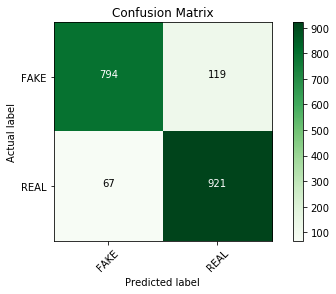

In [21]:
clf = MultinomialNB()
clf.fit(countTrain, yTrain)
pred = clf.predict(countTest)
score = metrics.accuracy_score(yTest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

accuracy:   0.863
Confusion matrix, without normalization


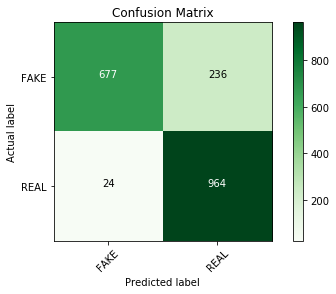

In [22]:
clf = MultinomialNB()
clf.fit(tfidfTrain, yTrain)
pred = clf.predict(tfidfTest)
score = metrics.accuracy_score(yTest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(yTest, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])